In [329]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

In [330]:
df = pd.read_csv('Data/emision-co2-autos_limpio.csv')

#link http://datos.ambiente.gob.ar/dataset?tags=CO2&tags=Emisiones

In [331]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMATICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMATICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [332]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

In [333]:
df.shape

(432, 19)

In [334]:
# Total de datos faltantes
df.isna().any(axis=1).sum()

332

In [335]:
# Datos faltantes por columna
df.isna().sum()

vehiculo_marca                20
vehiculo_modelo               20
vehiculo_tipo                 20
vehiculo_traccion             20
vehiculo_id_motor             20
vehiculo_cilindrada           21
vehiculo_potencia            307
vehiculo_tipo_transmision     15
vehiculo_tipo_combustible     14
vehiculo_standard_emision     21
lca_numero                   139
fecha_firma                   28
ensayo_gei_numero             20
ensayo_gei_laboratorio        20
emision_CO2                   20
consumo_urbano                22
consumo_extraurbano           22
consumo_mixto                 20
id_etiqueta                   20
dtype: int64

In [336]:
# Elimino las columnas con mayor cantidad de datos faltantes y las que considero que no voy a utilizar para el análisis
df.drop(['vehiculo_potencia','lca_numero', 'vehiculo_id_motor','vehiculo_id_motor','fecha_firma','ensayo_gei_numero','ensayo_gei_laboratorio','id_etiqueta'], axis=1, inplace=True)

In [337]:
df.shape

(432, 12)

In [338]:
df.isna().any(axis=1).sum()

26

In [339]:
df.dropna(inplace=True)

In [340]:
df.reset_index(inplace = True)

In [341]:
df.shape

(406, 13)

In [342]:
df.isna().sum()

index                        0
vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
dtype: int64

In [343]:
df.head()

,index,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [344]:
df['vehiculo_marca'].value_counts()

HYUNDAI              31
MERCEDES-BENZ        31
CHEVROLET            25
BMW                  23
AUDI                 21
TOYOTA               20
FORD                 18
RENAULT              17
FIAT                 17
MINI                 16
VOLKSWAGEN           15
HONDA                15
PEUGEOT              13
NISSAN               12
CITROËN              10
CHANGAN               9
LIFAN                 8
LEXUS                 8
SUZUKI                7
JEEP                  7
PEUGEOT / CITROËN     6
LAND ROVER            6
FAW                   5
DOMY                  4
BORGWARD              4
ZOTYE                 4
BAIC                  4
ALFA ROMEO            4
JAC                   4
MASERATI              4
PORSCHE               3
HAVAL                 3
DS                    3
KIA                   3
MITSUBISHI            3
FOTON                 2
CITROËN / DS          2
RAM                   2
ZANELLA               2
MERCEDES-AMG          2
CHERY                 2
SUBARU          

In [345]:
df['vehiculo_tipo'].value_counts()

SEDÁN 4 PUERTAS                          39
SEDÁN 5 PUERTAS                          38
RURAL                                    29
SUV                                      28
BERLINA                                  21
                                         ..
SEDÁN 3 PUERTAS CON PORTÓN                1
SEDÁN 4 PUERTSA CON BAÚL TRASERO NB       1
MOMOVOLÚMEN 4PUERTAS Y PORTÓN TRASERO     1
CHASIS CON CABINA DOBLE                   1
COUPÉ 3 + 2 PUERTAS                       1
Name: vehiculo_tipo, Length: 98, dtype: int64

In [346]:
df['vehiculo_traccion'].value_counts()

4x2          286
4x4           95
4x2 - 4x4     25
Name: vehiculo_traccion, dtype: int64

In [347]:
df['vehiculo_tipo_transmision'].value_counts()

AUTOMATICA                                     223
MANUAL                                         147
CVT                                             33
E-CVT (Hibrida controlada electrónicamente)      1
MANUAL AUTOMATIZADA                              1
CTT                                              1
Name: vehiculo_tipo_transmision, dtype: int64

In [348]:
df['vehiculo_tipo_combustible'].value_counts()

NAFTA                   316
GAS OIL                  61
NAFTA / ELECTRICIDAD     25
DIESEL                    4
Name: vehiculo_tipo_combustible, dtype: int64

In [349]:
df['vehiculo_standard_emision'].value_counts()

EURO V        264
EURO VI b      49
EURO VI c      39
EURO VI        24
EURO  V        18
EURO VI a       5
EURO VI d       5
EURUO V         1
EURO  VI b      1
Name: vehiculo_standard_emision, dtype: int64

In [350]:
df.columns


Index(['index', 'vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [351]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [352]:
feature_cols = [ 'vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']

In [353]:
X = df[feature_cols]
y = df.emision_CO2

In [354]:
# Instanciamos el modelo
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 40)

# Entrenamos el modelo 
linreg.fit(X_train, y_train)

LinearRegression()

In [355]:
y_pred = linreg.predict(X_test)

In [356]:
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9140232414926369


In [357]:
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

9.375827227885566
[7.49369982e-03 8.97130258e-01 2.29124687e+01 5.35363191e-04]


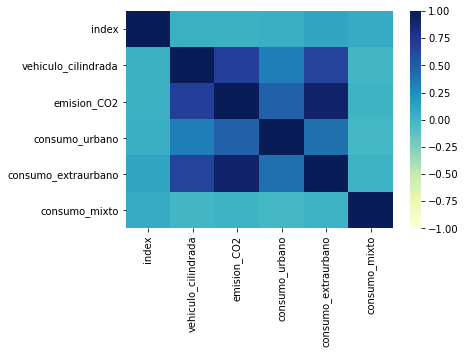

In [358]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [359]:
from sklearn import metrics
#print ('MAE:', metrics.mean_absolute_error(true, pred))
#print ('MSE:', metrics.mean_squared_error(true, pred))
#print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9140232414926369


In [360]:
from sklearn.model_selection import train_test_split

def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df.emision_CO2
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True , random_state = 40)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [361]:
print (train_test_rmse([ 'vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']))

13.099058834565392


In [362]:
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9140232414926369


## DUMMIES

In [363]:
df.columns

Index(['index', 'vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [364]:
tipo_df = pd.read_csv('Data/tipo_vehiculos.csv'  )
#Costo.. pero salio!!!!
tipo_df_dic = tipo_df.set_index('ID').T.to_dict('list')
#tipo_df_dic

In [365]:
df.vehiculo_tipo = df.vehiculo_tipo.replace(tipo_df_dic)


In [366]:
df.shape

(406, 13)

In [367]:
df.columns

Index(['index', 'vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [368]:
df.head(10)

,index,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,1,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,2,RENAULT,DUSTER 2.0 16v,5 Puertas,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,3,RENAULT,DUSTER 2.0 16v 4X4,5 Puertas,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,4,CITROËN,DS4,Coupe,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70
5,5,CITROËN,DS3,Coupe,4x2,1598.0,MANUAL,NAFTA,EURO V,140.80,8.20,4.70,6.00
6,6,LEXUS,GS450H,4 Puertas,4x2,3456.0,CVT,NAFTA / ELECTRICIDAD,EURO V,145.00,6.60,5.90,6.20
7,7,CITROËN,DS3,Coupe,4x2,1598.0,MANUAL,NAFTA,EURO V,141.20,8.00,4.90,6.00
8,8,PEUGEOT,208,5 Puertas,4x2,1587.0,MANUAL,NAFTA,EURO V,173.77,10.17,5.84,7.44
9,9,TOYOTA,RAV4,SUV,4x4,2494.0,AUTOMATICA,NAFTA,EURO V,197.70,11.40,6.90,8.50


In [369]:
categorical_columns = ['vehiculo_tipo','vehiculo_marca', 'vehiculo_traccion', 'vehiculo_tipo_transmision', 'vehiculo_standard_emision',
   'vehiculo_tipo_combustible']

In [370]:
encoder_categories = []

for col in categorical_columns:    
    col_categories = df[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array(['SUV', '4 Puertas', '5 Puertas', 'Coupe', 'Chasis Largo',
        'PICK UP', 'Furgon', 'Camion', '4x4', 'SEDÁN 3 PUERTAS COUPÉ',
        'Rural', 'BUS', 'PICK UP CABINA SIMPLE DOBLE',
        'SUV \x96 CROSSOVER 4 PUERTAS CON PORTÓN TRASERO',
        'BERLINA 4 PUERTAS Y PORTÓN TRASERO',
        'RURAL 4 PUERTAS CON PORTÓN TRASERO / SEDÁN 2 PUERTAS CON PORTÓN TRASERO',
        'SEDÁN 5 PUERTAS (HATCHBACK)'], dtype=object),
 array(['TOYOTA', 'RENAULT', 'CITROËN', 'LEXUS', 'PEUGEOT', 'FORD',
        'PEUGEOT / CITROËN', 'HYUNDAI', 'SUZUKI', 'CHEVROLET', 'LIFAN',
        'BMW', 'CITROËN / DS', 'HONDA', 'NISSAN', 'FIAT', 'CHERY',
        'VOLKSWAGEN', 'ALFA ROMEO', 'FAW', 'MERCEDES-BENZ', 'JEEP',
        'LAND ROVER', 'JAC', 'VOLVO', 'SHINERAY', 'CHANGAN', 'DS', 'MINI',
        'DOMY', 'BORGWARD', 'PORSCHE', 'AUDI', 'BAIC', 'ZANELLA', 'RAM',
        'FOTON', 'MASERATI', 'SUBARU', 'HAVAL', 'ISUZU', 'DONGFENG',
        'MERCEDES-AMG', 'MITSUBISHI', 'ZOTYE', 'KIA', 'GREAT WALL', 'KYC'

In [371]:
encoder_categories
from sklearn.preprocessing import OneHotEncoder

In [372]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False)

encoder = encoder.fit(df[categorical_columns])

In [373]:
X_encoded = encoder.transform(df[categorical_columns])

In [374]:
X_dummies = pd.DataFrame(X_encoded, columns = encoder.get_feature_names(categorical_columns))
X_dummies

,vehiculo_tipo_SUV,vehiculo_tipo_4 Puertas,vehiculo_tipo_5 Puertas,vehiculo_tipo_Coupe,vehiculo_tipo_Chasis Largo,vehiculo_tipo_PICK UP,vehiculo_tipo_Furgon,vehiculo_tipo_Camion,vehiculo_tipo_4x4,vehiculo_tipo_SEDÁN 3 PUERTAS COUPÉ,...,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
403,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
404,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [375]:
X_numerical = df[['vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']]

In [376]:
#X = pd.concat([df, X_dummies], axis = 1)
X = pd.concat([X_numerical, X_dummies], axis = 1)


In [377]:
X.shape

(406, 92)

In [378]:
X.head()

,vehiculo_cilindrada,consumo_urbano,consumo_extraurbano,consumo_mixto,vehiculo_tipo_SUV,vehiculo_tipo_4 Puertas,vehiculo_tipo_5 Puertas,vehiculo_tipo_Coupe,vehiculo_tipo_Chasis Largo,vehiculo_tipo_PICK UP,...,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,4461.0,11.56,8.94,9.90,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1997.0,10.50,6.10,7.70,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1998.0,11.13,6.98,8.52,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1998.0,11.20,7.01,8.55,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1598.0,10.60,6.00,7.70,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [379]:
#X.drop(['vehiculo_modelo', 'emision_CO2'], axis=1, inplace=True)
#X.drop(['vehiculo_modelo', 'emision_CO2', 'vehiculo_tipo','vehiculo_marca', 'vehiculo_traccion', 'vehiculo_tipo_transmision', 'vehiculo_standard_emision',
 #  'vehiculo_tipo_combustible'], axis=1, inplace=True)

y = df.emision_CO2

In [380]:
y.shape

(406,)

In [381]:
# Instanciamos el modelo
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 40)
# Entrenamos el modelo 
linreg.fit(X_train, y_train)

LinearRegression()

In [382]:
y_pred = linreg.predict(X_test)
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9278281892297295


In [383]:
print (train_test_rmse([ 'vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']))

13.099058834565392


In [384]:
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9278281892297295
